In [1]:
# Importing all libraries.
from pylab import *
from netCDF4 import Dataset
%matplotlib inline
import os
import cmocean as cm
from trackeddy.tracking import *
from trackeddy.datastruct import *
from trackeddy.geometryfunc import *
from trackeddy.init import *
from trackeddy.physics import *
from trackeddy.plotfunc import *

In [2]:
# Output data path
outputpath='/g/data3/hh5/tmp/akm157/mom01v5_kds75/output306/'
# Import SSH values to python environment.
ncfile=Dataset(outputpath+'rregionsouthern_ocean_daily_eta_t.nc')
eta=ncfile.variables['eta_t'][:]*100
# Import geographic coordinates (Lon,Lat)
lon=ncfile.variables['xt_ocean_sub01'][:]
lat=ncfile.variables['yt_ocean_sub01'][:]

In [3]:
# Import SSH 10 yrs mean values to python environment.
ncfile=Dataset('/home/156/jm5970/github/trackeddy/data.input/meanssh_10yrs_AEXP.nc')
ssh_mean=squeeze(ncfile.variables['SSH_mean'][:])
# Import geographic coordinates (Lon,Lat)
lon=ncfile.variables['Longitude'][:]
lat=ncfile.variables['Latitude'][:]

In [4]:
#Area in indexes, probably in the future it will be added an option for lon - lat coords.
eta=eta[0:60,300::,2900:]
ssh_mean=ssh_mean[300::,2900::]
lon=lon[2900::]
lat=lat[300::]
areamap=array([[0,len(lon)],[0,len(lat)]])
ssha=eta-ssh_mean
print(shape(eta))

(60, 631, 700)


# Default Values

Eccentricity Fit = 0.8

Ellipse Fit = 0.85

Gauss Fit = 0.65

In [5]:
eddytd=analyseddyzt(eta,lon,lat,0,60,1,25,5,5,data_meant=ssh_mean,areamap=areamap,mask=''\
                    ,destdir='',physics='',eccenfit=0.8,ellipsrsquarefit=0.85,gaussrsquarefit=0.65,\
                    diagnostics=False,pprint=False)

 0% [===========================================================>]100% Time Elapsed: 175 s  Number of contours analysed: 6577 


In [6]:
eddytdn=analyseddyzt(eta,lon,lat,0,60,1,-25,-5,-5,data_meant=ssh_mean,areamap=areamap,mask=''\
                    ,destdir='',physics='',eccenfit=0.8,ellipsrsquarefit=0.85,gaussrsquarefit=0.65,\
                    diagnostics=False,pprint=False)

 0% [===========================================================>]100% Time Elapsed: 138 s  Number of contours analysed: 5498 


In [7]:
threshold=1
eddyp=reconstruct_syntetic(shape(eta),lon,lat,eddytd)
eddyp[eddyp>=5]=np.nan
eddyn=reconstruct_syntetic(shape(eta),lon,lat,eddytdn)
eddyn[eddyn<=-5]=np.nan
eddyfield=eddyp+eddyn

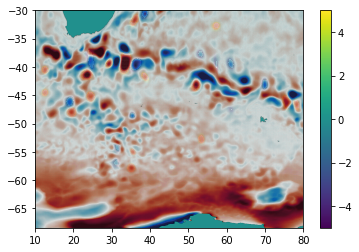

In [8]:
pcolormesh(lon,lat,eddyfield[0,:,:])
colorbar()
pcolormesh(lon,lat,ssha[0,:,:],shading='gouraud',cmap=cm.cm.balance,vmin=-40,vmax=40,alpha=0.1)

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
from matplotlib import animation, rc
rc('animation', html='html5')

###########

fig = plt.figure(figsize=(10, 10),facecolor='white')
gs = gridspec.GridSpec(1, 1)

#############################

ax1 = plt.subplot(gs[0,0])

lonmm,latmm=np.meshgrid(lon,lat)

map = Basemap(projection='ortho',lat_0=mean(lat),lon_0=mean(lon),resolution='c',ax=ax1)
lonm,latm=map(lonmm,latmm)
map.drawmeridians(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
map.drawparallels(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
map.fillcontinents(color='black',lake_color='black')
map.drawcoastlines()
map.drawcoastlines()

#quad2 = ax1.pcolormesh(lonm,latm,eddyfield[0,:,:],shading='gouraud',cmap=cm.cm.balance,\
#              vmin=-40,vmax=40)


def init():
    quad1.set_array([])
    quad2.set_array([])
    return quad1,quad2

def animate(iter):
    #ax1.contourf(lonm,latm,ssha[0,:,:],shading='gouraud',cmap=cm.cm.balance,vmin=-40,vmax=40,alpha=0.1)
    ax1.contourf(lonm,latm,ssha[iter,:,:],shading='gouraud',cmap=cm.cm.oxy,vmin=-40,vmax=40,alpha=0.4)
    ax1.contourf(lonm,latm,eddyfield[iter,:,:],shading='gouraud',cmap=cm.cm.balance,\
              vmin=-40,vmax=40,alpha=0.9)
    #quad2.set_array(ssha[iter,:,:].ravel())
    #quad1.set_array(eddyfield[iter,:,:].ravel())
    
    #ax1.pcolormesh(lonm,latm,eddyfield[iter,:,:],shading='gouraud',cmap=cm.cm.balance,vmin=-40,vmax=40,alpha=1)
    ax1.set_title('%03d'%(iter))
    
    #quad2.set_array(eddyfield[iter,:,:].ravel())
    return

gs.tight_layout(fig)

anim2 = animation.FuncAnimation(fig,animate,frames=60,interval=100,blit=False,repeat=True)
plt.close()
anim2

'Warning: Cannot label meridians on full-disk
                Geostationary, Orthographic or Azimuthal equidistant basemap

# Default Values

Eccentricity Fit = 0.6

Ellipse Fit = 0.85

Gauss Fit = 0.65

In [10]:
eddytd=analyseddyzt(eta,lon,lat,0,60,1,25,5,5,data_meant=ssh_mean,areamap=areamap,mask=''\
                    ,destdir='',physics='',eccenfit=0.75,ellipsrsquarefit=0.85,gaussrsquarefit=0.65,\
                    diagnostics=False,pprint=False)

 0% [===========================================================>]100% Time Elapsed: 151 s  Number of contours analysed: 6577 


In [11]:
eddytdn=analyseddyzt(eta,lon,lat,0,60,1,-25,-5,-5,data_meant=ssh_mean,areamap=areamap,mask=''\
                    ,destdir='',physics='',eccenfit=0.75,ellipsrsquarefit=0.85,gaussrsquarefit=0.65,\
                    diagnostics=False,pprint=False)

 0% [===========================================================>]100% Time Elapsed: 121 s  Number of contours analysed: 5498 


In [12]:
threshold=1
eddyp=reconstruct_syntetic(shape(eta),lon,lat,eddytd)
eddyp[eddyp>=5]=np.nan
eddyn=reconstruct_syntetic(shape(eta),lon,lat,eddytdn)
eddyn[eddyn<=-5]=np.nan
eddyfield=eddyp+eddyn

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
from matplotlib import animation, rc
rc('animation', html='html5')

###########

fig = plt.figure(figsize=(10, 10),facecolor='white')
gs = gridspec.GridSpec(1, 1)

#############################

ax1 = plt.subplot(gs[0,0])

lonmm,latmm=np.meshgrid(lon,lat)

map = Basemap(projection='ortho',lat_0=mean(lat),lon_0=mean(lon),resolution='c',ax=ax1)
lonm,latm=map(lonmm,latmm)
map.drawmeridians(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
map.drawparallels(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
map.fillcontinents(color='black',lake_color='black')
map.drawcoastlines()
map.drawcoastlines()

#quad2 = ax1.pcolormesh(lonm,latm,eddyfield[0,:,:],shading='gouraud',cmap=cm.cm.balance,\
#              vmin=-40,vmax=40)


def init():
    quad1.set_array([])
    quad2.set_array([])
    return quad1,quad2

def animate(iter):
    #ax1.contourf(lonm,latm,ssha[0,:,:],shading='gouraud',cmap=cm.cm.balance,vmin=-40,vmax=40,alpha=0.1)
    ax1.contourf(lonm,latm,ssha[iter,:,:],shading='gouraud',cmap=cm.cm.oxy,vmin=-40,vmax=40,alpha=0.5)
    ax1.contourf(lonm,latm,eddyfield[iter,:,:],shading='gouraud',cmap=cm.cm.balance,\
              vmin=-40,vmax=40,alpha=0.9)
    #quad2.set_array(ssha[iter,:,:].ravel())
    #quad1.set_array(eddyfield[iter,:,:].ravel())
    
    #ax1.pcolormesh(lonm,latm,eddyfield[iter,:,:],shading='gouraud',cmap=cm.cm.balance,vmin=-40,vmax=40,alpha=1)
    ax1.set_title('%03d'%(iter))
    
    #quad2.set_array(eddyfield[iter,:,:].ravel())
    return

gs.tight_layout(fig)

anim2 = animation.FuncAnimation(fig,animate,frames=60,interval=100,blit=False,repeat=True)
plt.close()
anim2

'Warning: Cannot label meridians on full-disk
                Geostationary, Orthographic or Azimuthal equidistant basemap

# Default Values

Eccentricity Fit = 0.8

Ellipse Fit = 0.5

Gauss Fit = 0.65

In [14]:
eddytd=analyseddyzt(eta,lon,lat,0,60,1,25,5,5,data_meant=ssh_mean,areamap=areamap,mask=''\
                    ,destdir='',physics='',eccenfit=0.8,ellipsrsquarefit=0.5,gaussrsquarefit=0.65,\
                    diagnostics=False,pprint=False)

 0% [===========================================================>]100% Time Elapsed: 229 s  Number of contours analysed: 6577 


In [15]:
eddytdn=analyseddyzt(eta,lon,lat,0,60,1,-25,-5,-5,data_meant=ssh_mean,areamap=areamap,mask=''\
                    ,destdir='',physics='',eccenfit=0.8,ellipsrsquarefit=0.5,gaussrsquarefit=0.65,\
                    diagnostics=False,pprint=False)

 0% [===========================================================>]100% Time Elapsed: 162 s  Number of contours analysed: 5498 


In [16]:
threshold=1
eddyp=reconstruct_syntetic(shape(eta),lon,lat,eddytd)
eddyp[eddyp>=5]=np.nan
eddyn=reconstruct_syntetic(shape(eta),lon,lat,eddytdn)
eddyn[eddyn<=-5]=np.nan
eddyfield=eddyp+eddyn

In [17]:
#pcolormesh(eddysplot[0,:,:])

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
from matplotlib import animation, rc
rc('animation', html='html5')

###########

fig = plt.figure(figsize=(10, 10),facecolor='white')
gs = gridspec.GridSpec(1, 1)

#############################

ax1 = plt.subplot(gs[0,0])

lonmm,latmm=np.meshgrid(lon,lat)

map = Basemap(projection='ortho',lat_0=mean(lat),lon_0=mean(lon),resolution='c',ax=ax1)
lonm,latm=map(lonmm,latmm)
map.drawmeridians(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
map.drawparallels(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
map.fillcontinents(color='black',lake_color='black')
map.drawcoastlines()
map.drawcoastlines()

#quad2 = ax1.pcolormesh(lonm,latm,eddyfield[0,:,:],shading='gouraud',cmap=cm.cm.balance,\
#              vmin=-40,vmax=40)


def init():
    quad1.set_array([])
    quad2.set_array([])
    return quad1,quad2

def animate(iter):
    #ax1.contourf(lonm,latm,ssha[0,:,:],shading='gouraud',cmap=cm.cm.balance,vmin=-40,vmax=40,alpha=0.1)
    ax1.contourf(lonm,latm,ssha[iter,:,:],shading='gouraud',cmap=cm.cm.oxy,vmin=-40,vmax=40,alpha=0.5)
    ax1.contourf(lonm,latm,eddyfield[iter,:,:],shading='gouraud',cmap=cm.cm.balance,\
              vmin=-40,vmax=40,alpha=0.9)
    #quad2.set_array(ssha[iter,:,:].ravel())
    #quad1.set_array(eddyfield[iter,:,:].ravel())
    
    #ax1.pcolormesh(lonm,latm,eddyfield[iter,:,:],shading='gouraud',cmap=cm.cm.balance,vmin=-40,vmax=40,alpha=1)
    ax1.set_title('%03d'%(iter))
    
    #quad2.set_array(eddyfield[iter,:,:].ravel())
    return

gs.tight_layout(fig)

anim2 = animation.FuncAnimation(fig,animate,frames=60,interval=100,blit=False,repeat=True)
plt.close()
anim2

'Warning: Cannot label meridians on full-disk
                Geostationary, Orthographic or Azimuthal equidistant basemap

# Default Values

Eccentricity Fit = 0.8

Ellipse Fit = 0.85

Gauss Fit = 0.90

In [19]:
eddytd=analyseddyzt(eta,lon,lat,0,60,1,25,5,5,data_meant=ssh_mean,areamap=areamap,mask=''\
                    ,destdir='',physics='',eccenfit=0.8,ellipsrsquarefit=0.85,gaussrsquarefit=0.9,\
                    diagnostics=False,pprint=False)

 0% [===========================================================>]100% Time Elapsed: 161 s  Number of contours analysed: 6577 


In [20]:
eddytdn=analyseddyzt(eta,lon,lat,0,60,1,-25,-5,-5,data_meant=ssh_mean,areamap=areamap,mask=''\
                    ,destdir='',physics='',eccenfit=0.8,ellipsrsquarefit=0.85,gaussrsquarefit=0.9,\
                    diagnostics=False,pprint=False)

 0% [===========================================================>]100% Time Elapsed: 128 s  Number of contours analysed: 5498 


In [21]:
threshold=1
eddyp=reconstruct_syntetic(shape(eta),lon,lat,eddytd)
eddyp[eddyp>=5]=np.nan
eddyn=reconstruct_syntetic(shape(eta),lon,lat,eddytdn)
eddyn[eddyn<=-5]=np.nan
eddyfield=eddyp+eddyn

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
from matplotlib import animation, rc
rc('animation', html='html5')

###########

fig = plt.figure(figsize=(10, 10),facecolor='white')
gs = gridspec.GridSpec(1, 1)

#############################

ax1 = plt.subplot(gs[0,0])

lonmm,latmm=np.meshgrid(lon,lat)

map = Basemap(projection='ortho',lat_0=mean(lat),lon_0=mean(lon),resolution='c',ax=ax1)
lonm,latm=map(lonmm,latmm)
map.drawmeridians(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
map.drawparallels(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
map.fillcontinents(color='black',lake_color='black')
map.drawcoastlines()
map.drawcoastlines()

#quad2 = ax1.pcolormesh(lonm,latm,eddyfield[0,:,:],shading='gouraud',cmap=cm.cm.balance,\
#              vmin=-40,vmax=40)


def init():
    quad1.set_array([])
    quad2.set_array([])
    return quad1,quad2

def animate(iter):
    #ax1.contourf(lonm,latm,ssha[0,:,:],shading='gouraud',cmap=cm.cm.balance,vmin=-40,vmax=40,alpha=0.1)
    ax1.contourf(lonm,latm,ssha[iter,:,:],shading='gouraud',cmap=cm.cm.oxy,vmin=-40,vmax=40,alpha=0.5)
    ax1.contourf(lonm,latm,eddyfield[iter,:,:],shading='gouraud',cmap=cm.cm.balance,\
              vmin=-40,vmax=40,alpha=0.9)
    #quad2.set_array(ssha[iter,:,:].ravel())
    #quad1.set_array(eddyfield[iter,:,:].ravel())
    
    #ax1.pcolormesh(lonm,latm,eddyfield[iter,:,:],shading='gouraud',cmap=cm.cm.balance,vmin=-40,vmax=40,alpha=1)
    ax1.set_title('%03d'%(iter))
    
    #quad2.set_array(eddyfield[iter,:,:].ravel())
    return

gs.tight_layout(fig)

anim2 = animation.FuncAnimation(fig,animate,frames=60,interval=100,blit=False,repeat=True)
plt.close()
anim2

'Warning: Cannot label meridians on full-disk
                Geostationary, Orthographic or Azimuthal equidistant basemap

OSError: [Errno 12] Cannot allocate memory

# Default Values

Eccentricity Fit = 1

Ellipse Fit = 0.85

Gauss Fit = 0.85

In [23]:
eddytd=analyseddyzt(eta,lon,lat,0,60,1,25,5,5,data_meant=ssh_mean,areamap=areamap,mask=''\
                    ,destdir='',physics='',eccenfit=1,ellipsrsquarefit=0.85,gaussrsquarefit=0.85,\
                    diagnostics=False,pprint=False)

 0% [===========================================================>]100% Time Elapsed: 275 s  Number of contours analysed: 6577 


In [24]:
eddytdn=analyseddyzt(eta,lon,lat,0,60,1,-25,-5,-5,data_meant=ssh_mean,areamap=areamap,mask=''\
                    ,destdir='',physics='',eccenfit=1,ellipsrsquarefit=0.85,gaussrsquarefit=0.85,\
                    diagnostics=False,pprint=False)

 0% [===========================================================>]100% Time Elapsed: 208 s  Number of contours analysed: 5498 


In [25]:
threshold=1
eddyp=reconstruct_syntetic(shape(eta),lon,lat,eddytd)
eddyp[eddyp>=5]=np.nan
eddyn=reconstruct_syntetic(shape(eta),lon,lat,eddytdn)
eddyn[eddyn<=-5]=np.nan
eddyfield=eddyp+eddyn

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
from matplotlib import animation, rc
rc('animation', html='html5')

###########

fig = plt.figure(figsize=(10, 10),facecolor='white')
gs = gridspec.GridSpec(1, 1)

#############################

ax1 = plt.subplot(gs[0,0])

lonmm,latmm=np.meshgrid(lon,lat)

map = Basemap(projection='ortho',lat_0=mean(lat),lon_0=mean(lon),resolution='c',ax=ax1)
lonm,latm=map(lonmm,latmm)
map.drawmeridians(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
map.drawparallels(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
map.fillcontinents(color='black',lake_color='black')
map.drawcoastlines()
map.drawcoastlines()

#quad2 = ax1.pcolormesh(lonm,latm,eddyfield[0,:,:],shading='gouraud',cmap=cm.cm.balance,\
#              vmin=-40,vmax=40)


def init():
    quad1.set_array([])
    quad2.set_array([])
    return quad1,quad2

def animate(iter):
    #ax1.contourf(lonm,latm,ssha[0,:,:],shading='gouraud',cmap=cm.cm.balance,vmin=-40,vmax=40,alpha=0.1)
    ax1.contourf(lonm,latm,ssha[iter,:,:],shading='gouraud',cmap=cm.cm.oxy,vmin=-40,vmax=40,alpha=0.5)
    ax1.contourf(lonm,latm,eddyfield[iter,:,:],shading='gouraud',cmap=cm.cm.balance,\
              vmin=-40,vmax=40,alpha=0.9)
    #quad2.set_array(ssha[iter,:,:].ravel())
    #quad1.set_array(eddyfield[iter,:,:].ravel())
    
    #ax1.pcolormesh(lonm,latm,eddyfield[iter,:,:],shading='gouraud',cmap=cm.cm.balance,vmin=-40,vmax=40,alpha=1)
    ax1.set_title('%03d'%(iter))
    
    #quad2.set_array(eddyfield[iter,:,:].ravel())
    return

gs.tight_layout(fig)

anim2 = animation.FuncAnimation(fig,animate,frames=60,interval=100,blit=False,repeat=True)
plt.close()
anim2

'Warning: Cannot label meridians on full-disk
                Geostationary, Orthographic or Azimuthal equidistant basemap

OSError: [Errno 12] Cannot allocate memory

# Default Values

Eccentricity Fit = 0.95

Ellipse Fit = 0.85

Gauss Fit = 0.85

In [27]:
eddytd=analyseddyzt(eta,lon,lat,0,60,1,25,5,5,data_meant=ssh_mean,areamap=areamap,mask=''\
                    ,destdir='',physics='',eccenfit=0.95,ellipsrsquarefit=0.85,gaussrsquarefit=0.85,\
                    diagnostics=False,pprint=False)

 0% [===========================================================>]100% Time Elapsed: 267 s  Number of contours analysed: 6577 


In [28]:
eddytdn=analyseddyzt(eta,lon,lat,0,60,1,-25,-5,-5,data_meant=ssh_mean,areamap=areamap,mask=''\
                    ,destdir='',physics='',eccenfit=0.95,ellipsrsquarefit=0.85,gaussrsquarefit=0.85,\
                    diagnostics=False,pprint=False)

 0% [===========================================================>]100% Time Elapsed: 201 s  Number of contours analysed: 5498 


In [29]:
threshold=1
eddyp=reconstruct_syntetic(shape(eta),lon,lat,eddytd)
eddyp[eddyp>=5]=np.nan
eddyn=reconstruct_syntetic(shape(eta),lon,lat,eddytdn)
eddyn[eddyn<=-5]=np.nan
eddyfield=eddyp+eddyn

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
from matplotlib import animation, rc
rc('animation', html='html5')

###########

fig = plt.figure(figsize=(10, 10),facecolor='white')
gs = gridspec.GridSpec(1, 1)

#############################

ax1 = plt.subplot(gs[0,0])

lonmm,latmm=np.meshgrid(lon,lat)

map = Basemap(projection='ortho',lat_0=mean(lat),lon_0=mean(lon),resolution='c',ax=ax1)
lonm,latm=map(lonmm,latmm)
map.drawmeridians(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
map.drawparallels(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
map.fillcontinents(color='black',lake_color='black')
map.drawcoastlines()
map.drawcoastlines()

#quad2 = ax1.pcolormesh(lonm,latm,eddyfield[0,:,:],shading='gouraud',cmap=cm.cm.balance,\
#              vmin=-40,vmax=40)


def init():
    quad1.set_array([])
    quad2.set_array([])
    return quad1,quad2

def animate(iter):
    #ax1.contourf(lonm,latm,ssha[0,:,:],shading='gouraud',cmap=cm.cm.balance,vmin=-40,vmax=40,alpha=0.1)
    ax1.contourf(lonm,latm,ssha[iter,:,:],shading='gouraud',cmap=cm.cm.oxy,vmin=-40,vmax=40,alpha=0.5)
    ax1.contourf(lonm,latm,eddyfield[iter,:,:],shading='gouraud',cmap=cm.cm.balance,\
              vmin=-40,vmax=40,alpha=0.9)
    #quad2.set_array(ssha[iter,:,:].ravel())
    #quad1.set_array(eddyfield[iter,:,:].ravel())
    
    #ax1.pcolormesh(lonm,latm,eddyfield[iter,:,:],shading='gouraud',cmap=cm.cm.balance,vmin=-40,vmax=40,alpha=1)
    ax1.set_title('%03d'%(iter))
    
    #quad2.set_array(eddyfield[iter,:,:].ravel())
    return

gs.tight_layout(fig)

anim2 = animation.FuncAnimation(fig,animate,frames=60,interval=100,blit=False,repeat=True)
plt.close()
anim2

'Warning: Cannot label meridians on full-disk
                Geostationary, Orthographic or Azimuthal equidistant basemap

OSError: [Errno 12] Cannot allocate memory

# Default Values

Eccentricity Fit = 0.8

Ellipse Fit = 0.5

Gauss Fit = 0.5

In [31]:
eddytd=analyseddyzt(eta,lon,lat,0,60,1,25,5,5,data_meant=ssh_mean,areamap=areamap,mask=''\
                    ,destdir='',physics='',eccenfit=0.8,ellipsrsquarefit=0.5,gaussrsquarefit=0.5,\
                    diagnostics=False,pprint=False)

 0% [=========================================>]70% Time Elapsed: 164 s  Number of contours analysed: 4674 

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-31-f9cb565ef74c>", line 1, in <module>
    eddytd=analyseddyzt(eta,lon,lat,0,60,1,25,5,5,data_meant=ssh_mean,areamap=areamap,mask=''                    ,destdir='',physics='',eccenfit=0.8,ellipsrsquarefit=0.5,gaussrsquarefit=0.5,                    diagnostics=False,pprint=False)
  File "/home/156/jm5970/github/trackeddy/trackeddy/tracking.py", line 813, in analyseddyzt
    ,diagnostics=diagnostics,plotdata=plotdata,pprint=pprint)
  File "/home/156/jm5970/github/trackeddy/trackeddy/tracking.py", line 211, in scan_eddym
    checkland=eddylandcheck(CONTeach,center,lon_contour,lat_contour,ssh_in_contour)
  File "/home/156/jm5970/github/trackeddy/trackeddy/geometryfunc.py", line 873, in eddylandcheck
    idxcheck,idycheck=find2l(lon,lat,

KeyboardInterrupt: 

In [ ]:
eddytdn=analyseddyzt(eta,lon,lat,0,60,1,-25,-5,-5,data_meant=ssh_mean,areamap=areamap,mask=''\
                    ,destdir='',physics='',eccenfit=0.8,ellipsrsquarefit=0.5,gaussrsquarefit=0.5,\
                    diagnostics=False,pprint=False)

In [ ]:
threshold=1
eddyp=reconstruct_syntetic(shape(eta),lon,lat,eddytd)
eddyp[eddyp>=5]=np.nan
eddyn=reconstruct_syntetic(shape(eta),lon,lat,eddytdn)
eddyn[eddyn<=-5]=np.nan
eddyfield=eddyp+eddyn

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
from matplotlib import animation, rc
rc('animation', html='html5')

###########

fig = plt.figure(figsize=(10, 10),facecolor='white')
gs = gridspec.GridSpec(1, 1)

#############################

ax1 = plt.subplot(gs[0,0])

lonmm,latmm=np.meshgrid(lon,lat)

map = Basemap(projection='ortho',lat_0=mean(lat),lon_0=mean(lon),resolution='c',ax=ax1)
lonm,latm=map(lonmm,latmm)
map.drawmeridians(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
map.drawparallels(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
map.fillcontinents(color='black',lake_color='black')
map.drawcoastlines()
map.drawcoastlines()

#quad2 = ax1.pcolormesh(lonm,latm,eddyfield[0,:,:],shading='gouraud',cmap=cm.cm.balance,\
#              vmin=-40,vmax=40)


def init():
    quad1.set_array([])
    quad2.set_array([])
    return quad1,quad2

def animate(iter):
    #ax1.contourf(lonm,latm,ssha[0,:,:],shading='gouraud',cmap=cm.cm.balance,vmin=-40,vmax=40,alpha=0.1)
    ax1.contourf(lonm,latm,ssha[iter,:,:],shading='gouraud',cmap=cm.cm.oxy,vmin=-40,vmax=40,alpha=0.5)
    ax1.contourf(lonm,latm,eddyfield[iter,:,:],shading='gouraud',cmap=cm.cm.balance,\
              vmin=-40,vmax=40,alpha=0.9)
    #quad2.set_array(ssha[iter,:,:].ravel())
    #quad1.set_array(eddyfield[iter,:,:].ravel())
    
    #ax1.pcolormesh(lonm,latm,eddyfield[iter,:,:],shading='gouraud',cmap=cm.cm.balance,vmin=-40,vmax=40,alpha=1)
    ax1.set_title('%03d'%(iter))
    
    #quad2.set_array(eddyfield[iter,:,:].ravel())
    return

gs.tight_layout(fig)

anim2 = animation.FuncAnimation(fig,animate,frames=60,interval=100,blit=False,repeat=True)
plt.close()
anim2

# Default Values

Eccentricity Fit = 1

Ellipse Fit = 0.5

Gauss Fit = 0.5

In [ ]:
eddytd=analyseddyzt(eta,lon,lat,0,60,1,25,5,5,data_meant=ssh_mean,areamap=areamap,mask=''\
                    ,destdir='',physics='',eccenfit=1,ellipsrsquarefit=0.5,gaussrsquarefit=0.5,\
                    diagnostics=False,pprint=False)

In [ ]:
eddytdn=analyseddyzt(eta,lon,lat,0,60,1,-25,-5,-5,data_meant=ssh_mean,areamap=areamap,mask=''\
                    ,destdir='',physics='',eccenfit=1,ellipsrsquarefit=0.5,gaussrsquarefit=0.5,\
                    diagnostics=False,pprint=False)

In [ ]:
threshold=1
eddyp=reconstruct_syntetic(shape(eta),lon,lat,eddytd)
eddyp[eddyp>=5]=np.nan
eddyn=reconstruct_syntetic(shape(eta),lon,lat,eddytdn)
eddyn[eddyn<=-5]=np.nan
eddyfield=eddyp+eddyn

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
from matplotlib import animation, rc
rc('animation', html='html5')

###########

fig = plt.figure(figsize=(10, 10),facecolor='white')
gs = gridspec.GridSpec(1, 1)

#############################

ax1 = plt.subplot(gs[0,0])

lonmm,latmm=np.meshgrid(lon,lat)

map = Basemap(projection='ortho',lat_0=mean(lat),lon_0=mean(lon),resolution='c',ax=ax1)
lonm,latm=map(lonmm,latmm)
map.drawmeridians(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
map.drawparallels(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
map.fillcontinents(color='black',lake_color='black')
map.drawcoastlines()
map.drawcoastlines()

#quad2 = ax1.pcolormesh(lonm,latm,eddyfield[0,:,:],shading='gouraud',cmap=cm.cm.balance,\
#              vmin=-40,vmax=40)


def init():
    quad1.set_array([])
    quad2.set_array([])
    return quad1,quad2

def animate(iter):
    #ax1.contourf(lonm,latm,ssha[0,:,:],shading='gouraud',cmap=cm.cm.balance,vmin=-40,vmax=40,alpha=0.1)
    ax1.contourf(lonm,latm,ssha[iter,:,:],shading='gouraud',cmap=cm.cm.oxy,vmin=-40,vmax=40,alpha=0.5)
    ax1.contourf(lonm,latm,eddyfield[iter,:,:],shading='gouraud',cmap=cm.cm.balance,\
              vmin=-40,vmax=40,alpha=0.9)
    #quad2.set_array(ssha[iter,:,:].ravel())
    #quad1.set_array(eddyfield[iter,:,:].ravel())
    
    #ax1.pcolormesh(lonm,latm,eddyfield[iter,:,:],shading='gouraud',cmap=cm.cm.balance,vmin=-40,vmax=40,alpha=1)
    ax1.set_title('%03d'%(iter))
    
    #quad2.set_array(eddyfield[iter,:,:].ravel())
    return

gs.tight_layout(fig)

anim2 = animation.FuncAnimation(fig,animate,frames=60,interval=100,blit=False,repeat=True)
plt.close()
anim2

# Default Values

Eccentricity Fit = 1

Ellipse Fit = 0

Gauss Fit = 0

In [ ]:
eddytd=analyseddyzt(eta,lon,lat,0,60,1,25,5,5,data_meant=ssh_mean,areamap=areamap,mask=''\
                    ,destdir='',physics='',eccenfit=1,ellipsrsquarefit=0,gaussrsquarefit=0,\
                    diagnostics=False,pprint=False)

In [ ]:
eddytdn=analyseddyzt(eta,lon,lat,0,60,1,-25,-5,-5,data_meant=ssh_mean,areamap=areamap,mask=''\
                    ,destdir='',physics='',eccenfit=1,ellipsrsquarefit=0,gaussrsquarefit=0,\
                    diagnostics=False,pprint=False)

In [ ]:
threshold=1
eddyp=reconstruct_syntetic(shape(eta),lon,lat,eddytd)
eddyp[eddyp>=5]=np.nan
eddyn=reconstruct_syntetic(shape(eta),lon,lat,eddytdn)
eddyn[eddyn<=-5]=np.nan
eddyfield=eddyp+eddyn

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
from matplotlib import animation, rc
rc('animation', html='html5')

###########

fig = plt.figure(figsize=(10, 10),facecolor='white')
gs = gridspec.GridSpec(1, 1)

#############################

ax1 = plt.subplot(gs[0,0])

lonmm,latmm=np.meshgrid(lon,lat)

map = Basemap(projection='ortho',lat_0=mean(lat),lon_0=mean(lon),resolution='c',ax=ax1)
lonm,latm=map(lonmm,latmm)
map.drawmeridians(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
map.drawparallels(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
map.fillcontinents(color='black',lake_color='black')
map.drawcoastlines()
map.drawcoastlines()

#quad2 = ax1.pcolormesh(lonm,latm,eddyfield[0,:,:],shading='gouraud',cmap=cm.cm.balance,\
#              vmin=-40,vmax=40)


def init():
    quad1.set_array([])
    quad2.set_array([])
    return quad1,quad2

def animate(iter):
    #ax1.contourf(lonm,latm,ssha[0,:,:],shading='gouraud',cmap=cm.cm.balance,vmin=-40,vmax=40,alpha=0.1)
    ax1.contourf(lonm,latm,ssha[iter,:,:],shading='gouraud',cmap=cm.cm.oxy,vmin=-40,vmax=40,alpha=0.5)
    ax1.contourf(lonm,latm,eddyfield[iter,:,:],shading='gouraud',cmap=cm.cm.balance,\
              vmin=-40,vmax=40,alpha=0.9)
    #quad2.set_array(ssha[iter,:,:].ravel())
    #quad1.set_array(eddyfield[iter,:,:].ravel())
    
    #ax1.pcolormesh(lonm,latm,eddyfield[iter,:,:],shading='gouraud',cmap=cm.cm.balance,vmin=-40,vmax=40,alpha=1)
    ax1.set_title('%03d'%(iter))
    
    #quad2.set_array(eddyfield[iter,:,:].ravel())
    return

gs.tight_layout(fig)

anim2 = animation.FuncAnimation(fig,animate,frames=60,interval=100,blit=False,repeat=True)
plt.close()
anim2